Santiago Bernal de Leon - 2210352

Isabella Duran Nagles - 2210296

Miguel Ángel León Cárdenas - 2200644


Enlance al drive con las imagenes: https://drive.google.com/drive/folders/1-1xg0pHJKv6cRM67lAnqOM7o4ReH9GCc?usp=sharing

###PRIMER ESTRUCTURA



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab import drive
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow import keras
import os
import librosa
import librosa.display
from sklearn.model_selection import train_test_split
import glob
import cv2
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import regularizers
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
tf.keras.backend.clear_session #entrena desde cero

<function keras.src.backend.clear_session()>

In [ ]:
dataset = os.listdir('/content/drive/MyDrive/PROYECTO/')
# Ordenar la lista de forma ascendente
dataset.sort()

data = []
IMG_SIZE = (224, 224)  # Definir el tamaño de la imagen

for i, sub_dirs in enumerate(dataset):
    print("Extrayendo Directorios: {}".format(sub_dirs))

    for archivo_n in glob.glob(os.path.join('/content/drive/MyDrive/PROYECTO/', sub_dirs, '*.jpg')):
        print("Procesando archivo: {}".format(archivo_n))

        etiqueta = i

        # Leer la imagen y cambiar el tamaño
        image = cv2.imread(archivo_n)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Cambiar el orden de los canales
        image = cv2.resize(image, IMG_SIZE)

        # Normalizar píxeles (escalar valores entre 0 y 1)
        image = image / 255.0

        print('Etiqueta de Elemento: {}'.format(etiqueta))

        data.append((image, etiqueta))

carac = pd.DataFrame(data, columns=['Caracteristicas', 'Etiqueta'])
print(carac)


Extrayendo Directorios: 10k_buenos
Procesando archivo: /content/drive/MyDrive/PROYECTO/10k_buenos/IMG_4745.jpg
Etiqueta de Elemento: 0
Procesando archivo: /content/drive/MyDrive/PROYECTO/10k_buenos/IMG_4749.jpg
Etiqueta de Elemento: 0
Procesando archivo: /content/drive/MyDrive/PROYECTO/10k_buenos/IMG_4739.jpg
Etiqueta de Elemento: 0
Procesando archivo: /content/drive/MyDrive/PROYECTO/10k_buenos/IMG_4751.jpg
Etiqueta de Elemento: 0
Procesando archivo: /content/drive/MyDrive/PROYECTO/10k_buenos/IMG_4740.jpg
Etiqueta de Elemento: 0
Procesando archivo: /content/drive/MyDrive/PROYECTO/10k_buenos/IMG_4742.jpg
Etiqueta de Elemento: 0
Procesando archivo: /content/drive/MyDrive/PROYECTO/10k_buenos/IMG_4750.jpg
Etiqueta de Elemento: 0
Procesando archivo: /content/drive/MyDrive/PROYECTO/10k_buenos/IMG_4744.jpg
Etiqueta de Elemento: 0
Procesando archivo: /content/drive/MyDrive/PROYECTO/10k_buenos/IMG_4741.jpg
Etiqueta de Elemento: 0
Procesando archivo: /content/drive/MyDrive/PROYECTO/10k_buenos/IM

In [ ]:
x = np.array(carac.Caracteristicas.tolist())
y = np.array(carac.Etiqueta.tolist())

print(x.shape)
print(y.shape)

(685, 224, 224, 3)
(685,)


In [ ]:
X = np.asarray(x).astype(dtype=np.float32)
y = np.asarray(y).astype(dtype=np.int32)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
print(len(X_train))
print(len(y_train))

print(y_train)

548
548
[2 2 2 0 1 0 2 1 2 0 0 0 1 0 1 2 2 1 1 2 2 1 2 1 1 1 0 0 1 2 2 0 2 2 1 1 1
 2 0 0 2 0 1 0 0 0 2 2 2 1 1 2 0 1 0 0 0 0 2 2 0 0 1 2 2 2 1 2 2 1 0 1 1 0
 2 1 1 0 0 0 2 2 1 1 2 1 0 1 1 0 1 1 0 0 1 1 2 2 1 0 1 2 2 1 0 0 2 2 0 2 2
 1 1 2 0 0 2 2 0 1 0 0 2 0 1 0 1 0 2 0 0 2 1 0 2 1 1 1 0 1 1 1 1 1 0 2 2 2
 2 1 1 0 1 0 2 2 0 1 2 1 0 1 2 2 0 1 0 0 2 2 0 2 1 2 1 2 0 0 1 0 0 2 1 2 0
 1 0 2 0 2 1 1 1 1 1 0 0 2 1 0 2 0 1 0 1 1 1 0 1 1 1 1 2 0 2 2 1 0 0 1 2 2
 2 1 1 0 0 1 2 2 0 0 2 2 0 1 2 1 2 1 2 1 1 1 0 2 1 0 1 1 0 0 1 2 1 1 0 2 2
 0 2 2 2 1 2 2 2 0 1 0 2 0 1 0 1 1 1 2 2 0 2 2 1 1 2 0 1 2 2 0 0 1 2 0 0 0
 1 2 0 1 2 2 2 0 2 0 0 1 1 2 2 1 0 0 2 2 2 1 2 1 1 0 1 1 1 2 1 2 0 0 1 1 1
 0 1 2 0 1 2 2 1 1 2 0 2 1 1 1 0 0 2 0 0 1 1 2 2 0 1 1 1 1 1 1 0 0 0 1 1 1
 1 0 2 2 0 2 0 1 2 2 0 2 2 2 2 1 2 2 1 1 2 0 1 2 1 1 2 1 1 2 1 1 1 1 1 1 2
 2 2 1 2 2 2 2 0 1 0 2 0 2 0 2 2 2 0 1 1 2 2 0 1 1 2 0 0 2 2 0 2 1 2 0 0 0
 0 0 2 1 2 1 1 1 1 2 0 0 2 0 2 2 0 0 0 0 2 1 0 0 0 1 1 1 1 1 2 1 0 0 2 1 2
 0 2 1 0 2 2 0 0 

In [ ]:
print("Imagenes de entrenamiento Tamaño:%s, Tamaño de las etiquetas%s" %(X_train.shape, y_train.shape))
print("Imagenes de entrenamiento Tamaño:{0}, Tamaño de las etiquetas:{1}".format(X_test.shape, y_test.shape))


Imagenes de entrenamiento Tamaño:(548, 224, 224, 3), Tamaño de las etiquetas(548,)
Imagenes de entrenamiento Tamaño:(137, 224, 224, 3), Tamaño de las etiquetas:(137,)


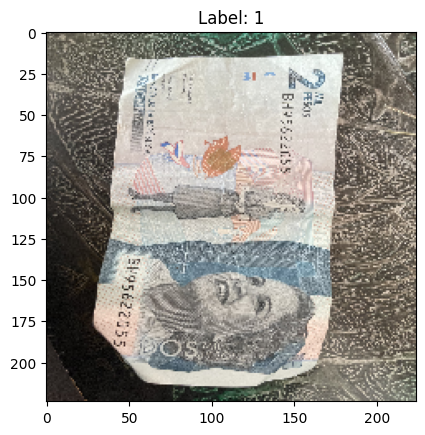

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(X_train[50])
plt.gca().set_title('Label: '+str(y_train[50]))
plt.show()

In [ ]:
# Crear el modelo
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3), kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # 3 clases de billetes

# Mostrar la arquitectura del modelo
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 111, 111, 32)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 54, 54, 64)       

In [ ]:
# Compilar el modelo
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# labels
num_classes = 3
y_train_ohe = keras.utils.to_categorical(y_train, num_classes)
y_test_ohe = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
print(y_test_ohe.shape)

(137, 3)


In [ ]:
datagen = ImageDataGenerator(rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
datagen.fit(X_train)
iterator = datagen.flow(X_train,y_train_ohe, batch_size=64)
muestras = X_train.shape[0] // 64

In [ ]:
# Definir tasa de aprendizaje, tamaño del lote y número de épocas
learning_rate = 0.001
batch_size = 32
epochs = 50

In [ ]:
import time

# Crear EarlyStopping para evitar el sobreajuste
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Compilar el modelo con la tasa de aprendizaje
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Registrar el tiempo de inicio
start_time = time.time()


# Entrenar el modelo con los datos de entrenamiento y validación
history = model.fit(iterator, batch_size=batch_size,
                    steps_per_epoch=muestras,
                    epochs=epochs,
                    validation_data=(X_test, y_test_ohe),
                    callbacks=[early_stopping])

# Calcular el tiempo total de entrenamiento
end_time = time.time()
training_time = end_time - start_time

# Imprimir el tiempo total de entrenamiento
print(f'Tiempo total de entrenamiento: {training_time:.2f} segundos')
# Obtener la precisión y pérdida finales en los datos de validación
final_loss, final_accuracy = model.evaluate(X_test, y_test_ohe)

# Imprimir los resultados finales
print(f'Pérdida final en datos de validación: {final_loss:.4f}')
print(f'Precisión final en datos de validación: {final_accuracy:.4f}')

Epoch 1/50
8/8 [==============================] - 12s 1s/step - loss: 15.5147 - accuracy: 0.3306 - val_loss: 8.5438 - val_accuracy: 0.3504
Epoch 2/50
8/8 [==============================] - 6s 734ms/step - loss: 7.9087 - accuracy: 0.3781 - val_loss: 7.0378 - val_accuracy: 0.3869
Epoch 3/50
8/8 [==============================] - 9s 1s/step - loss: 6.3380 - accuracy: 0.3636 - val_loss: 5.4205 - val_accuracy: 0.3577
Epoch 4/50
8/8 [==============================] - 6s 723ms/step - loss: 4.8382 - accuracy: 0.3781 - val_loss: 4.2573 - val_accuracy: 0.5182
Epoch 5/50
8/8 [==============================] - 8s 1s/step - loss: 3.8797 - accuracy: 0.4298 - val_loss: 3.4422 - val_accuracy: 0.5620
Epoch 6/50
8/8 [==============================] - 6s 709ms/step - loss: 3.1833 - accuracy: 0.4959 - val_loss: 2.9119 - val_accuracy: 0.5036
Epoch 7/50
8/8 [==============================] - 9s 1s/step - loss: 2.7574 - accuracy: 0.4453 - val_loss: 2.6095 - val_accuracy: 0.5912
Epoch 8/50
8/8 [==============

In [ ]:
model.save('ModeloPunto1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


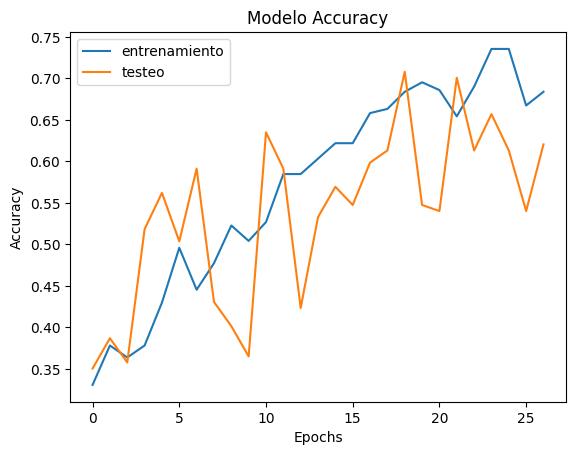

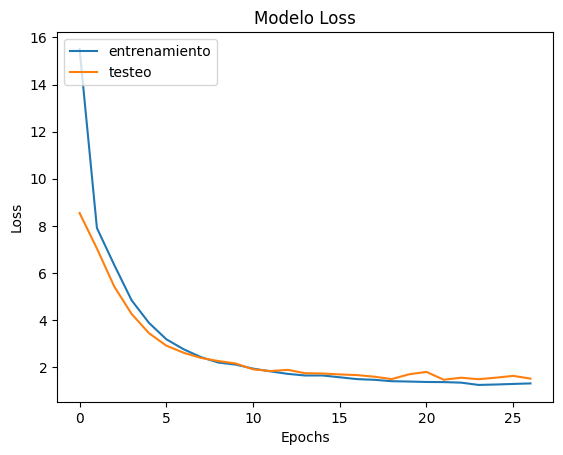

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Modelo Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['entrenamiento', 'testeo'], loc="upper left")
plt.show()
#Loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Modelo Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['entrenamiento', 'testeo'], loc="upper left")
plt.show()

5/5 [==============================] - 0s 19ms/step


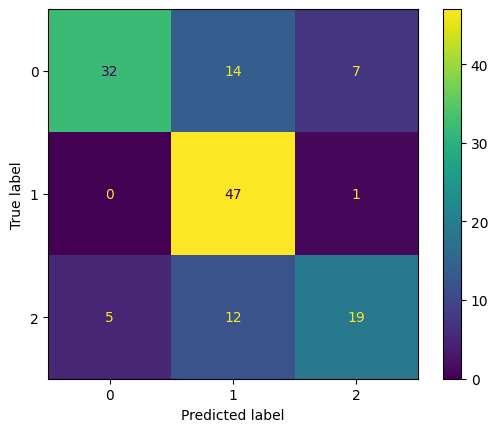

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
y_pred = model.predict(X_test)
result = confusion_matrix(y_test, y_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(result)
disp.plot()
plt.show()

In [ ]:
# Obtener las probabilidades de las clases para el conjunto de prueba
y_prob = model.predict(X_test)

# Obtener la clase con la mayor probabilidad para cada muestra
y_pred = np.argmax(y_prob, axis=1)

# Imprimir el reporte de clasificación
target_names = ['10', '2', '5']
print(classification_report(y_test, y_pred, target_names=target_names))

5/5 [==============================] - 0s 19ms/step
              precision    recall  f1-score   support

          10       0.86      0.60      0.71        53
           2       0.64      0.98      0.78        48
           5       0.70      0.53      0.60        36

    accuracy                           0.72       137
   macro avg       0.74      0.70      0.70       137
weighted avg       0.75      0.72      0.71       137



In [ ]:
# Importar las bibliotecas necesarias
import cv2
import glob #sirve para unir paths
import os

etiquetas = ['0', '1', '2']

# Ruta del archivo de imagen de prueba
# En este caso, solo se probará una imagen '9-j.jpg'
#for file_name in glob.glob(os.path.join('/content/drive/MyDrive/test/9-j.jpg')):

# Ruta del archivo de imagen de prueba
img_path = '/content/twolukas.jpg'

# Leer la imagen y realizar preprocesamiento
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224))
img = img / 255.
img = np.reshape(img, [1, 224, 224, 3])

# Medir el tiempo de predicción
start_time = time.time()

# Hacer la predicción
resultado = model.predict(img)

# Calcular el tiempo transcurrido
elapsed_time = time.time() - start_time

# Obtener la etiqueta correspondiente a la predicción y la probabilidad asociada
res_word = etiquetas[(np.argmax(resultado, axis=1))[0]]
probabilidad = resultado[0][np.argmax(resultado, axis=1)] * 100

# Imprimir los resultados y el tiempo de predicción
print("Para el archivo:{0}, usted dijo:{1}, con un {2}% de certeza".format(img_path, res_word, probabilidad))
print("Tiempo de predicción: {:.4f} segundos".format(elapsed_time))

1/1 [==============================] - 0s 160ms/step
Para el archivo:/content/twolukas.jpg, usted dijo:1, con un [57.559288]% de certeza
Tiempo de predicción: 0.2213 segundos


###SEGUNDA ESTRUCTURA


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras import regularizers
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
import tensorflow.keras.layers as LK
import tensorflow.keras.models as MK
from keras.models import load_model
from sklearn.metrics import confusion_matrix
#import seaborn as sns; sns.set()
from sklearn.metrics import classification_report

In [ ]:
#Creemos un modelo secuencial
entrada = LK.Input(shape=(224,224,3))
conv1 = LK.Conv2D(6,(5,5),padding='valid', activation='relu')(entrada)
pool1 = LK.MaxPool2D((2,2),(2,2))(conv1)
conv2 = LK.Conv2D(16,(5,5),padding='valid', activation='relu')(pool1)
pool2 = LK.MaxPool2D((2,2),(2,2))(conv2)
flat = LK.Flatten()(pool2)
fc1 = LK.Dense(120,activation='relu')(flat)
fc2 = LK.Dense(84,activation='relu')(fc1)
salida = LK.Dense(3,activation='softmax')(fc2)
modelo2 = MK.Model(entrada,salida)

modelo2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 220, 220, 6)       456       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 110, 110, 6)       0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 106, 106, 16)      2416      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 53, 53, 16)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 44944)             0     

In [ ]:
#modelo2.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])

In [ ]:
# labels
num_classes=3
y_train_ohe = keras.utils.to_categorical(y_train, num_classes) #one hot encoded
y_test_ohe = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
print(y_test_ohe.shape)

(137, 3)


In [ ]:
#from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
datagen.fit(X_train)
iterator = datagen.flow(X_train,y_train_ohe, batch_size=64)
muestras = X_train.shape[0] // 64


In [ ]:
# Crear EarlyStopping para evitar el sobreajuste
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Compilar el modelo con la tasa de aprendizaje
modelo2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Registrar el tiempo de inicio
start_time = time.time()


# Entrenar el modelo con los datos de entrenamiento y validación
history2 = modelo2.fit(iterator, batch_size=batch_size,
                    steps_per_epoch=muestras,
                    epochs=epochs,
                    validation_data=(X_test, y_test_ohe),
                    callbacks=[early_stopping])

# Calcular el tiempo total de entrenamiento
end_time = time.time()
training_time = end_time - start_time

# Imprimir el tiempo total de entrenamiento
print(f'Tiempo total de entrenamiento: {training_time:.2f} segundos')
# Obtener la precisión y pérdida finales en los datos de validación
final_loss, final_accuracy = modelo2.evaluate(X_test, y_test_ohe)

# Imprimir los resultados finales
print(f'Pérdida final en datos de validación: {final_loss:.4f}')
print(f'Precisión final en datos de validación: {final_accuracy:.4f}')

Epoch 1/50
8/8 [==============================] - 8s 863ms/step - loss: 1.2787 - accuracy: 0.5449 - val_loss: 0.8246 - val_accuracy: 0.6204
Epoch 2/50
8/8 [==============================] - 7s 777ms/step - loss: 0.7666 - accuracy: 0.6674 - val_loss: 0.5974 - val_accuracy: 0.7299
Epoch 3/50
8/8 [==============================] - 9s 1s/step - loss: 0.6411 - accuracy: 0.7355 - val_loss: 0.6399 - val_accuracy: 0.7226
Epoch 4/50
8/8 [==============================] - 5s 623ms/step - loss: 0.6174 - accuracy: 0.7211 - val_loss: 0.4652 - val_accuracy: 0.8029
Epoch 5/50
8/8 [==============================] - 8s 986ms/step - loss: 0.5236 - accuracy: 0.7789 - val_loss: 0.5092 - val_accuracy: 0.7664
Epoch 6/50
8/8 [==============================] - 5s 632ms/step - loss: 0.4696 - accuracy: 0.7975 - val_loss: 0.4814 - val_accuracy: 0.7883
Epoch 7/50
8/8 [==============================] - 5s 633ms/step - loss: 0.4688 - accuracy: 0.8161 - val_loss: 0.3779 - val_accuracy: 0.8029
Epoch 8/50
8/8 [=======

In [ ]:
modelo2.save('ModeloPunto1.h5')

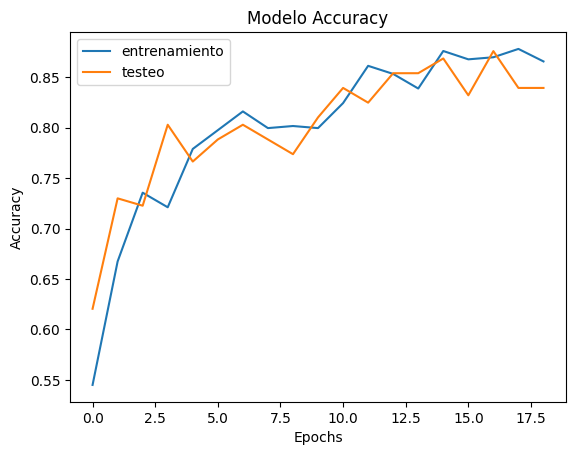

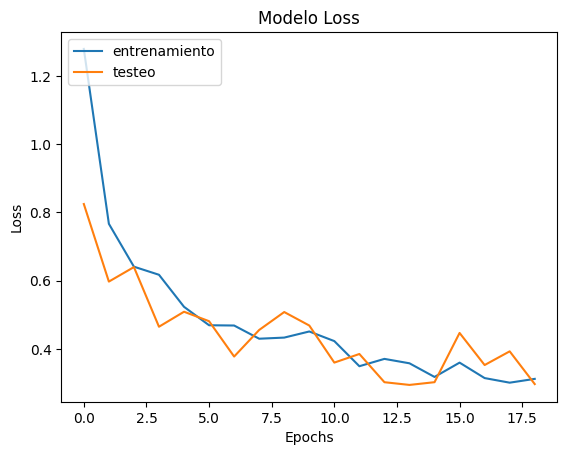

In [ ]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Modelo Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['entrenamiento', 'testeo'], loc="upper left")
plt.show()
#Loss

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Modelo Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['entrenamiento', 'testeo'], loc="upper left")
plt.show()

5/5 [==============================] - 0s 12ms/step


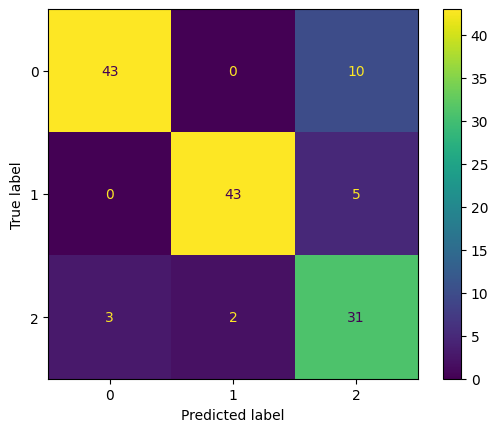

In [ ]:
modelo2.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
y_pred = modelo2.predict(X_test)
result = confusion_matrix(y_test, y_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(result)
disp.plot()
plt.show()

In [ ]:
# Obtener las probabilidades de las clases para el conjunto de prueba
y_prob = modelo2.predict(X_test)

# Obtener la clase con la mayor probabilidad para cada muestra
y_pred = np.argmax(y_prob, axis=1)

# Imprimir el reporte de clasificación
target_names = ['10', '2', '5']
print(classification_report(y_test, y_pred, target_names=target_names))

5/5 [==============================] - 0s 15ms/step
              precision    recall  f1-score   support

          10       0.93      0.81      0.87        53
           2       0.96      0.90      0.92        48
           5       0.67      0.86      0.76        36

    accuracy                           0.85       137
   macro avg       0.85      0.86      0.85       137
weighted avg       0.87      0.85      0.86       137



###TRANSFER LEARNING


In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [ ]:
from keras.applications import MobileNetV2
from keras.layers import GlobalAveragePooling2D, Dense, Dropout
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
# Convertir etiquetas a formato one-hot
y_train_one_hot = to_categorical(y_train, num_classes=3)
y_test_one_hot = to_categorical(y_test, num_classes=3)

# Definir la arquitectura del modelo MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congelar las capas convolucionales del modelo base
for layer in base_model.layers:
    layer.trainable = False

# Agregar capas personalizadas para la clasificación
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.35)(x)
output = Dense(3, activation='softmax')(x)  # 3 clases de billetes

# Crear el modelo completo
model3 = Model(inputs=base_model.input, outputs=output)

# Compilar el modelo
model3.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Crear EarlyStopping para evitar el sobreajuste
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Registrar el tiempo de inicio
start_time = time.time()

# Entrenar el modelo con los datos de entrenamiento y validación
history3 = model3.fit(X_train, y_train_one_hot, epochs=20, validation_data=(X_test, y_test_one_hot), callbacks=[early_stopping])

# Calcular el tiempo total de entrenamiento
end_time = time.time()
training_time = end_time - start_time

# Evaluar el modelo en los datos de prueba
test_loss, test_acc = model3.evaluate(X_test, y_test_one_hot)
print(f'Accuracy en datos de prueba: {test_acc}')
print(f'Tiempo total de entrenamiento: {training_time:.2f} segundos')



Epoch 1/20
18/18 [==============================] - 5s 127ms/step - loss: 0.7877 - accuracy: 0.6588 - val_loss: 0.2218 - val_accuracy: 0.9343
Epoch 2/20
18/18 [==============================] - 1s 62ms/step - loss: 0.2450 - accuracy: 0.9215 - val_loss: 0.1705 - val_accuracy: 0.9343
Epoch 3/20
18/18 [==============================] - 1s 72ms/step - loss: 0.1127 - accuracy: 0.9745 - val_loss: 0.0487 - val_accuracy: 0.9927
Epoch 4/20
18/18 [==============================] - 1s 73ms/step - loss: 0.0534 - accuracy: 0.9945 - val_loss: 0.0254 - val_accuracy: 1.0000
Epoch 5/20
18/18 [==============================] - 1s 75ms/step - loss: 0.0395 - accuracy: 0.9945 - val_loss: 0.0216 - val_accuracy: 1.0000
Epoch 6/20
18/18 [==============================] - 1s 76ms/step - loss: 0.0299 - accuracy: 0.9964 - val_loss: 0.0153 - val_accuracy: 1.0000
Epoch 7/20
18/18 [==============================] - 1s 71ms/step - loss: 0.0201 - accuracy: 0.9982 - val_loss: 0.0131 - val_accuracy: 1.0000
Epoch 8/20
1

In [ ]:
model3.save('Modelo_Tranfer_Ler3.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Evaluar el modelo en el conjunto de prueba
test_loss_efficientnet, test_acc_efficientnet = model3.evaluate(X_test, y_test_one_hot)
print(f'Accuracy on test set: {test_acc_efficientnet * 100:.2f}%')

5/5 [==============================] - 0s 72ms/step - loss: 0.0023 - accuracy: 1.0000
Accuracy on test set: 100.00%


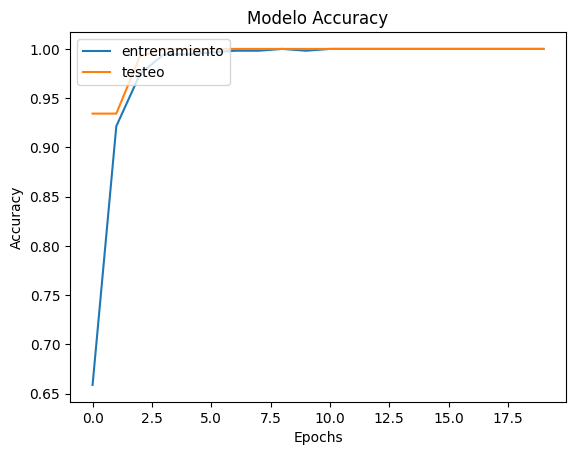

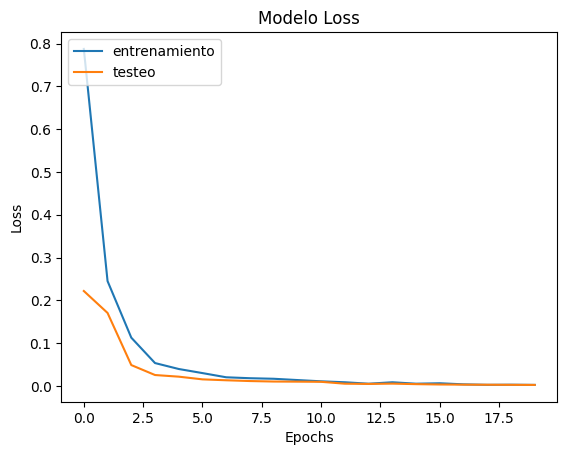

In [ ]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Modelo Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['entrenamiento', 'testeo'], loc="upper left")
plt.show()
#Loss

plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Modelo Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['entrenamiento', 'testeo'], loc="upper left")
plt.show()

5/5 [==============================] - 1s 48ms/step


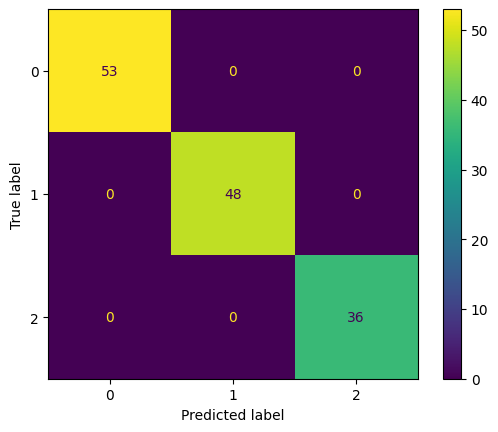

In [ ]:
model3.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
y_pred = model3.predict(X_test)
result = confusion_matrix(y_test, y_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(result)
disp.plot()
plt.show()

In [ ]:
# Importar las bibliotecas necesarias
import cv2
import glob #sirve para unir paths
import os

etiquetas = ['0', '1', '2']

# Ruta del archivo de imagen de prueba
# En este caso, solo se probará una imagen '9-j.jpg'
#for file_name in glob.glob(os.path.join('/content/drive/MyDrive/test/9-j.jpg')):

# Ruta del archivo de imagen de prueba
img_path = '/content/twolukas.jpg'

# Leer la imagen y realizar preprocesamiento
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224))
img = img / 255.
img = np.reshape(img, [1, 224, 224, 3])

# Medir el tiempo de predicción
start_time = time.time()

# Hacer la predicción
resultado = model3.predict(img)

# Calcular el tiempo transcurrido
elapsed_time = time.time() - start_time

# Obtener la etiqueta correspondiente a la predicción y la probabilidad asociada
res_word = etiquetas[(np.argmax(resultado, axis=1))[0]]
probabilidad = resultado[0][np.argmax(resultado, axis=1)] * 100

# Imprimir los resultados y el tiempo de predicción
print("Para el archivo:{0}, usted dijo:{1}, con un {2}% de certeza".format(img_path, res_word, probabilidad))
print("Tiempo de predicción: {:.4f} segundos".format(elapsed_time))


1/1 [==============================] - 0s 34ms/step
Para el archivo:/content/twolukas.jpg, usted dijo:1, con un [60.552574]% de certeza
Tiempo de predicción: 0.0944 segundos


In [ ]:
# Obtener las probabilidades de las clases para el conjunto de prueba
y_prob = model3.predict(X_test)

# Obtener la clase con la mayor probabilidad para cada muestra
y_pred = np.argmax(y_prob, axis=1)

# Imprimir el reporte de clasificación
target_names = ['10', '2', '5']
print(classification_report(y_test, y_pred, target_names=target_names))

5/5 [==============================] - 0s 50ms/step
              precision    recall  f1-score   support

          10       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        48
           5       1.00      1.00      1.00        36

    accuracy                           1.00       137
   macro avg       1.00      1.00      1.00       137
weighted avg       1.00      1.00      1.00       137

